# Assignment 06

Erik Strand <br> 24 February 2021

# Due by Wednesday 02/24/2021 (7pm)

### Other important deadlines
* Project proposal submission: 03/03/2021, 11:59pm (ET)
* Please arrange a zoom meeting with me to discuss a topic and data before 03/03/2021
* Midterm presentation: 03/17/2021 in class (online)
* Midterm packet (paper and presentation slides): 03/17/2021, 11:59pm (ET)

## In this assignment, we will review K-Means Clustering.
__Please submit a python script and markdown using Jupyter notebook (.ipynb file).__

* Don’t forget to finish the lab materials. 
* Please do not share your works publicly on GitHub or other places until the deadline.
* Some part of coding can be identical if you work with classmeates but annotation/comments must be individually written.

# Cluster New York City business history
   
Goal: Cluster the economic trends in NYC using K-Means clustering algorithm
Dataset:

* New York City 1994-2013 business data ('nyc_business.csv')
* New York City zipcode data (You will need to download a shapdfile here https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u or you can use 'nyc-zip-code-tabulation-areas-polygons.geojson')

In [1]:
# Load modules here

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

# 1. Data preparation and exploration
### (1) Load NYC 1994-2013 business data

    nyc_business.csv

In [2]:
business = pd.read_csv("../data/nyc_business.csv")
business.head()

,zip,94,95,96,97,98,99,00,01,02,...,04,05,06,07,08,09,10,11,12,13
0,10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,...,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
1,10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,...,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
2,10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,...,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
3,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
4,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479


### (2) Create X (input) variables as numpy array
* You don't need a zipcode column
* You need the rest of the columns (1994-2013) for your input features
* Please use .values function of pandas dataframe to create a numpy array (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) - you can also find some reference from the last lab session (sparsePCA part)

In [3]:
business = business.drop('zip', axis=1)
business = business.drop_duplicates()
business = business.astype(float)
values = business.values
print(values.shape)

(230, 20)


### (3) Normalize (z-score normalization) data

* Since the scale of the business change across the neighborhoods is different (i.e. some neighborhoods have changed approximately 6K - 7K scale, while other neighborhoods have changed around 30 - 40), you need to normalize data to compare neighborhoods' business change trends at the same scale. 
* Here we will apply a z-score normalization (mean = 0, std = 1) to _each neighborhood (zipcode)_.
* You can use stats.zscore() function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) and for loops to normalize all zipcodes.
* After the z-score normalization process, 
    * Your normalized array should be the same shape with the original array (that created just above)
    * Mean values and standard deviation values of each zipcode should be 0 and 1 respectively.
    
* __If you prefer other methods (e.g. StandardScaler or processing manually)__, feel free to stick with your own method.

In [4]:
for i in range(0, len(values)):
    values[i] = stats.zscore(values[i])

In [5]:
print(values[0].std())
print(np.mean(values[0]))
print(values)
print(values.shape)

1.0
-2.7200464103316335e-15
[[-1.83163152 -1.17325024 -1.26941829 ... -0.14499183 -0.08581149
   0.19529512]
 [-1.7228135  -1.63190671 -1.37217303 ...  1.20698241  1.31607056
   1.40438001]
 [-1.8725281  -1.45724969 -1.31996757 ...  1.22661573  1.41537864
   1.63159798]
 ...
 [-0.41203569 -0.67616114 -0.78181131 ...  1.48966751  1.38401733
   1.27836715]
 [-0.81500559 -1.36036249 -1.23917207 ...  1.12404117  1.12404117
   1.18463638]
 [-1.54935655 -1.72442508 -1.37428801 ...  0.72653443  1.25174003
  -0.32387679]]
(230, 20)


### (4) Plot the normalized data
* X-axis will be year (1994-2013)
* Y-axis will be normalized #of business in zipcode level
* Even though we have 20-dimensional data (20 years), the data can be represented 2-dimensional timeseries plot.

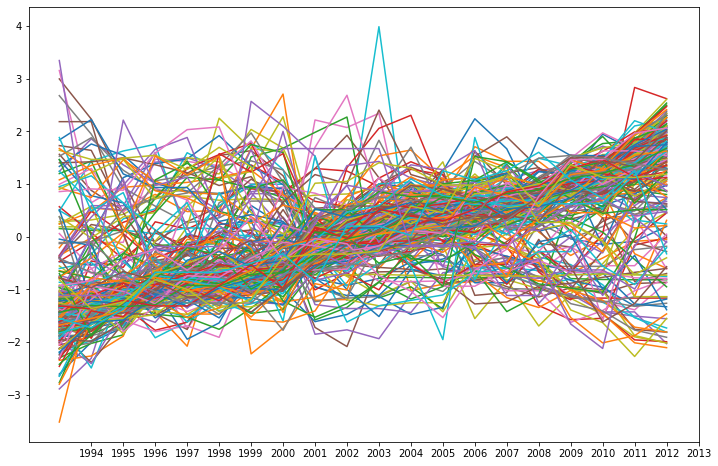

In [6]:
plt.figure(figsize = (12,8))

plt.plot(values.transpose())
#plt.boxplot(values) #alternate way of showing data, looks cleaner
plt.xticks(range(1,21), range(1994,2014))

plt.show()

# 2. K-Means Clustering Analysis
### (1) Cluster NYC business history using K=3

In [7]:
km = KMeans(n_clusters=3, random_state=0)
group_km = km.fit_predict(values)

### (2) Plot NYC business history data (normalized) using three differnt color based on the clustering result

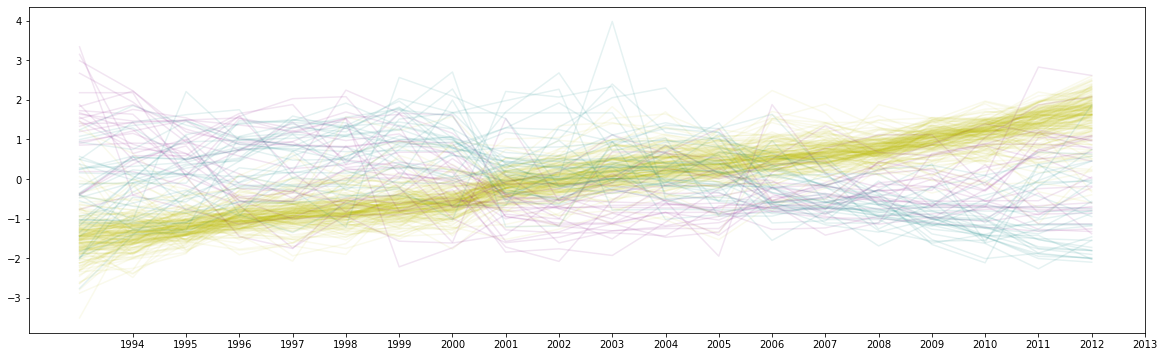

In [8]:
plt.figure(figsize = (20,6))

plt.plot(values[group_km == 0].transpose(), color = "y", alpha = 0.075)
plt.plot(values[group_km == 1].transpose(), color = "purple", alpha = 0.1)
plt.plot(values[group_km == 2].transpose(), color = "teal", alpha = 0.1)

plt.xticks(range(1,21), range(1994,2014))
plt.show()

### (3) You could see some trends. In order to verify this, please add mean center line of each clusters using the same color but bold lineweight. 
* You need to calulate mean values of each cluster in every year and store as a list type.
* For your reference, you will get a similar plot like below. 
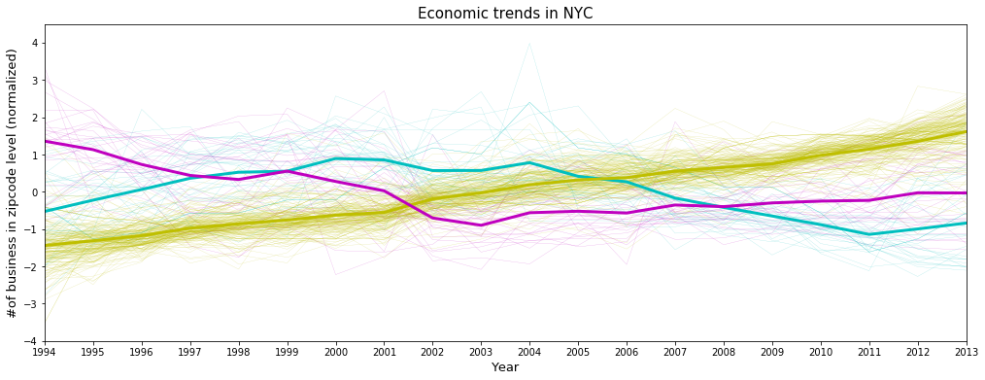

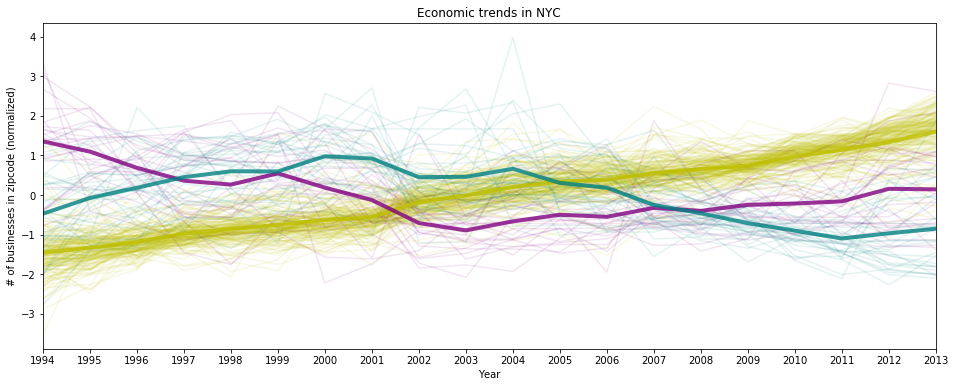

In [9]:
plt.figure(figsize = (16,6))

colors = ['y', 'purple', 'teal']

for i in range(0, 3): 
    plt.plot(values[group_km == i].transpose(), color = colors[i], alpha = 0.1)
    
# separate for loops to preserve plot order with mean lines on top
for i in range(0, 3): 
    plt.plot(values[group_km == i].mean(axis = 0), color = colors[i], linewidth = 4, alpha = 0.8)

plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(range(0,20), range(1994,2014))
plt.title("Economic trends in NYC")
plt.xlabel("Year")
plt.ylabel("# of businesses in zipcode (normalized)")
plt.show()

# 3. Find the optimal K using either elbow method or Silhoutte method

In [10]:
wss = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    km.fit(values)
    wss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow test')

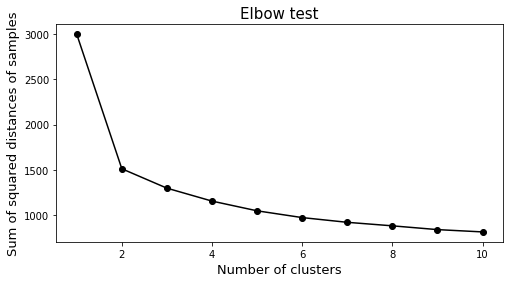

In [11]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wss, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Sum of squared distances of samples', fontsize=13)
plt.title('Elbow test', fontsize=15)

In [12]:
silhoutte_avg = []

for i in range(2, 11):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    y_km = km.fit_predict(values)
    silhoutte_avg.append(silhouette_score(values, y_km))

Text(0.5, 1.0, 'Silhoutte test')

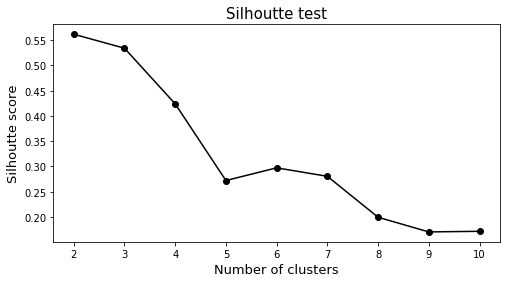

In [13]:
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhoutte_avg, marker='o', c='k')

plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Silhoutte score', fontsize=13)
plt.title('Silhoutte test', fontsize=15)

# 4. Cluster NYC business trend using the optimal K that you found above.

In [14]:
km = KMeans(n_clusters=2, random_state=0)
group_km = km.fit_predict(values)

# 5. Plot the final clustering result (timeseries plot with mean center lines) using the optimal K

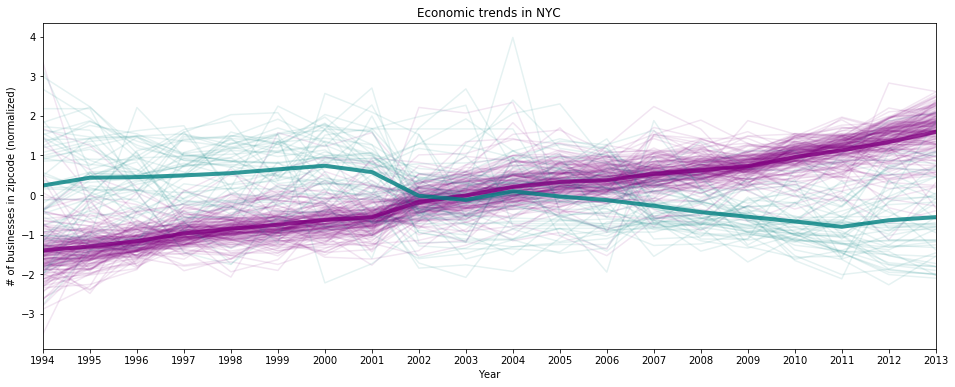

In [15]:
plt.figure(figsize = (16,6))

for i in range(0, 2): 
    plt.plot(values[group_km == i].transpose(), color = colors[i + 1], alpha = 0.1)
    
for i in range(0, 2): 
    plt.plot(values[group_km == i].mean(axis = 0), color = colors[i + 1], linewidth = 4, alpha = 0.8)

plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(range(0,20), range(1994,2014))
plt.title("Economic trends in NYC")
plt.xlabel("Year")
plt.ylabel("# of businesses in zipcode (normalized)")
plt.show()

# 6. Mapping your clustering result and explain your findings
* New York City zipcode data (You will need to download a shapdfile here https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u or you can use 'nyc-zip-code-tabulation-areas-polygons.geojson' provided)
* GeoPandas is required for this task!

In [16]:
zipcode = gpd.read_file("../data/zipcode")
business = pd.read_csv("../data/nyc_business.csv").drop_duplicates()
business['group'] = group_km

In [17]:
zipcode['zip'] = zipcode['MODZCTA'].astype('int')
output = pd.merge(zipcode, business, on='zip', how='left')
output.head()

,MODZCTA,label,geometry,zip,94,95,96,97,98,99,...,05,06,07,08,09,10,11,12,13,group
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,0.0
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,0.0
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,0.0
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958....",10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,0.0
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19...",10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,0.0


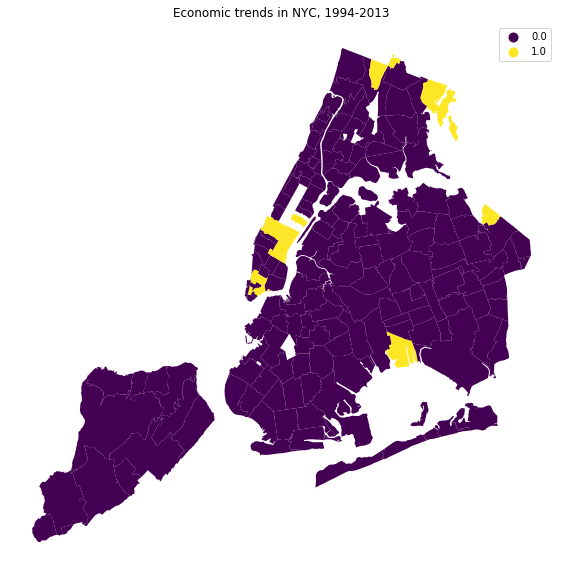

In [18]:
ax = output.plot(column='group', legend=True, categorical=True, cmap='viridis',figsize=(10,10))
plt.title("Economic trends in NYC, 1994-2013")
plt.axis(False)
plt.show()

Across New York City, zip codes tend to fit into one of two categories in terms of business activity between 1994 and 2013. A large subset of zip codes saw the number of business within their boundaries increase over this period; for most of these areas, the growth was gradual but consistent across the 20 year period. The second, much smaller group consists of zip codes in which fewer businesses existed in 2013 than in 1994. The average zip code in this group actually saw a moderate and steady increase in activity between 1994 and around 2001, followed by a gradual decline ever since. 

The group of zip codes that declined over this period consists of two types of neighborhoods: those on the far outskirts of the outer boroughs, and those concentrated in lower and midtown Manhattan. Given the timeline of the decline and neighborhood characteristics, it stands to reason that the change in these different kinds of neighborhoods likely came from very different sources. Fringe neighborhoods in the boroughs may have lost businesses either to the suburbs or to more central locations in the city; their slight decline is logical. On the other hand, lower Manhattan areas that declined are most likely due to the residual effects of 9/11. Most of the zip codes surrounding the WTC site have lost business; given the sharp drop in 2001, it stands to reason that this was driven by the attacks. In midtown, the loss in business is probably impacted somewhat less by 9/11, though residual fears about a repeat attack may certainly have contributed to the decline in economic activity in the prominent built-up landscape of midtown. This area's decline likely also owes to other factors, such as the 2008 financial crash, the ongoing pandemic, and the outsourcing of many industries to locations outside New York City. 